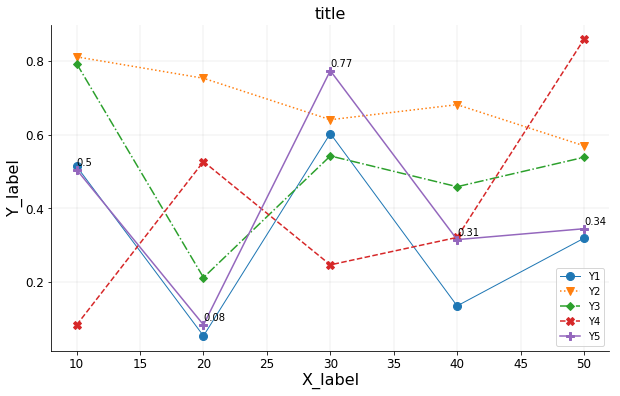

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.DataFrame({'X' :[10,20,30,40,50],
                   'Y1':list(np.random.uniform(0,1,size = 5)),
                   'Y2':list(np.random.uniform(0,1,size = 5)),
                   'Y3':list(np.random.uniform(0,1,size = 5)),
                   'Y4':list(np.random.uniform(0,1,size = 5)),
                   'Y5':list(np.random.uniform(0,1,size = 5)),
                   'Y6':list(np.random.uniform(0,1,size = 5))})


# marker type: see https://matplotlib.org/api/markers_api.html
# all possible line dash:'-',':', '-.', '--'


# font setting
font = {'fontsize':16,
        'fontweight' : 20,
        'family': 'DejaVu Sans',          # font family, default is DejaVu Sans
        'verticalalignment': 'center',    # 'top', 'bottom', 'center', 'baseline'
        'horizontalalignment': 'center'}  # 'center', 'right', 'left'

# allow multiple graphing
fig, ax = plt.subplots(figsize=(10,6))


# title
plt.title("title", font, loc='center', pad=10)

# legend
# labelpad: Spacing in points between the label and the x-axis.
plt.xlabel('X_label', fontdict=font, labelpad=10)
plt.ylabel('Y_label', fontdict=font, labelpad=10)

# ticks
plt.xticks(np.arange(0, 55, step=5), fontsize=12)
plt.yticks(np.arange(0, 1, step=0.2), fontsize=12)


plt.plot('X', 'Y1', data=df, marker='o', markersize=8, linestyle='-',linewidth=1)
plt.plot('X', 'Y2', data=df, marker='v', markersize=8, linestyle=':')
plt.plot('X', 'Y3', data=df, marker='D', markersize=6, linestyle='-.')
plt.plot('X', 'Y4', data=df, marker='X', markersize=8, linestyle='--')
plt.plot('X', 'Y5', data=df, marker='P', markersize=8, linestyle='-')


# present number on graph
for x,y in zip(df['X'].values.tolist(),df['Y5'].values.tolist()):
    plt.text(x, y+0.01, str(round(y,2)), color = 'black')


# removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# background grid setting
ax.xaxis.grid(color ='grey', linewidth=0.2, alpha=0.6) # alpha: soft color
ax.yaxis.grid(color ='grey', linewidth=0.2, alpha=0.6) # alpha: soft color

plt.legend(ncol=1)
plt.show()
